In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据

In [44]:
Block32 = pd.read_csv('../../RSP数据块/Block 32.csv')
Block42 = pd.read_csv('../../RSP数据块/Block 42.csv')
Block = pd.concat([Block32, Block42])

In [5]:
Block.head()

,label,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.708794,-0.723713,1.466915,0.454904,-0.675541,1.015649,-0.608027,-0.371373,2.173076,...,-1.813517,-0.022461,0.000000,1.003404,1.067204,0.982603,0.852593,0.920366,0.853741,0.771432
1,1.0,0.900771,0.069098,1.612289,2.089648,1.109618,0.889506,0.110880,-0.171798,2.173076,...,0.508394,0.934865,0.000000,0.857136,0.747389,0.996611,0.790457,0.765875,0.923511,0.850548
2,0.0,1.366712,1.114166,-1.385177,1.040457,-0.843880,1.425866,-0.798151,-0.807115,0.000000,...,0.742418,0.163538,0.000000,1.453993,1.868135,0.977681,1.931689,1.033562,1.579627,1.602993
3,1.0,0.907542,1.112218,1.354833,0.723252,1.008751,1.181458,-0.101029,-0.574277,0.000000,...,0.853183,-0.764381,0.000000,1.177070,0.926694,0.990393,1.142528,1.089035,0.989048,1.108498
4,0.0,1.772260,-0.638004,-0.451898,1.417073,0.161868,1.024169,-0.407010,1.389426,2.173076,...,-0.242812,-1.465235,3.101961,1.040527,1.065762,1.154507,0.748957,0.415975,0.930093,0.851782


In [45]:
# difference会搞错特征的顺序
# features = Block.columns.difference(['label'])

X_rsp32 = Block32.drop('label',axis=1)
y_rsp32 = Block32['label']
print('X_rsp32 shape: ',X_rsp32.shape)

X_rsp42 = Block42.drop('label',axis=1)
y_rsp42 = Block42['label']
print('X_rsp42 shape: ',X_rsp42.shape)

X_train = Block.drop('label',axis=1)
y_train = Block['label']
print('X shape: ',X_train.shape)

X_rsp32 shape:  (154000, 28)
X_rsp42 shape:  (154000, 28)
X shape:  (308000, 28)


# 异常检测

In [46]:
# 导入所有异常检测模型
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
# 模型保存
from joblib import dump, load
import os
import seaborn as sns
# 其他
import warnings
warnings.filterwarnings('ignore') 

## 异常检测

### 测试

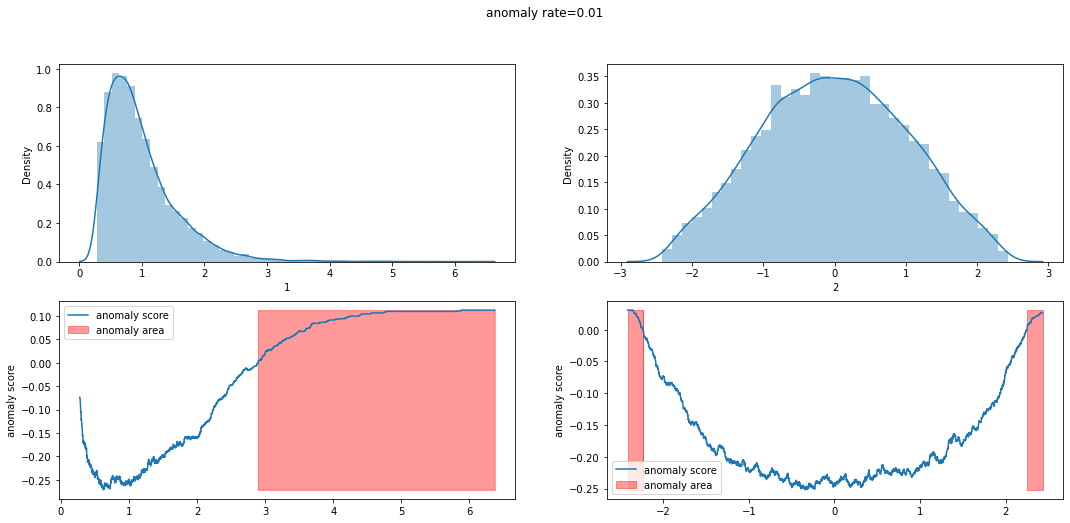

In [41]:
#定义隔离森林
IF1 = IForest(n_estimators=100, contamination=0.01)
#训练客流量数据
IF1.fit(X_sample['1'].values.reshape(-1, 1))
#在特征1的最小值和最大值之间分割数据
x1 = np.linspace(X_sample['1'].min(), X_sample['1'].max(), len(X_sample)).reshape(-1,1)
#生成所有数据的异常值分数
##  分值越大越异常
anomaly_score1 = IF1.decision_function(x1)
#预测异常值
outlier1 = IF1.predict(x1)

## -----------
IF2 = IForest(n_estimators=100, contamination=0.01)
#训练订单量数据
IF2.fit(X_sample['2'].values.reshape(-1, 1))
#在订单量的最小值和最大值之间分割数据
x2 = np.linspace(X_sample['2'].min(), X_sample['2'].max(), len(X_sample)).reshape(-1,1)
#生成所有数据的异常值分数
anomaly_score2 = IF2.decision_function(x2)
#预测异常值
outlier2 = IF2.predict(x2)
##-------------

plt.figure(figsize=(18,8))
plt.suptitle('anomaly rate=0.01')
plt.subplot(2,2,1)
sns.distplot(X_sample['1'])

plt.subplot(2,2,2)
sns.distplot(X_sample['2'])

plt.subplot(2,2,3)
plt.plot(x1, anomaly_score1, label='anomaly score')
plt.fill_between(
    x1.T[0], 
    np.min(anomaly_score1), 
    np.max(anomaly_score1), 
    where=outlier1==1,
    color='r', 
    alpha=.4, 
    label='anomaly area'
)
plt.legend()
plt.ylabel('anomaly score')

plt.subplot(2,2,4)
plt.plot(x2, anomaly_score2, label='anomaly score')
plt.fill_between(
    x2.T[0], 
    np.min(anomaly_score2), 
    np.max(anomaly_score2), 
    where=outlier2==1, 
    color='r', 
    alpha=.4,
    label='anomaly area'
)
plt.legend()
plt.ylabel('anomaly score')
plt.show();

###  可视化特征"1"和"2"的异常检测结果以选择异常检测算法

In [108]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
X_tmp = X_rsp32[['1','2']].sample(2000)
X_tmp[['1','2']] = StandardScaler().fit_transform(X_tmp[['1','2']])
X_tmp = X_tmp.reset_index(drop=True)
X_tmp

,1,2
0,0.695168,0.403220
1,-0.001657,1.764758
2,-0.552172,-1.805236
3,-0.631276,0.794332
4,1.227996,0.891374
...,...,...
1995,0.259129,1.467749
1996,-1.248997,0.882552
1997,-0.041853,-0.937733
1998,1.440548,0.045437


In [109]:
#设定异常值比例
outliers_fraction = 0.01
 
# 初始化 LSCP 探测集
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(
            contamination=outliers_fraction,
            check_estimator=False, 
            random_state=0
        ),
    'Histogram-base Outlier Detection (HBOS)':
        HBOS(contamination=outliers_fraction),
    'Isolation Forest': 
        IForest(
            contamination=outliers_fraction,
            random_state=0
        ),
    'K Nearest Neighbors (KNN)': 
        KNN(contamination=outliers_fraction),
    'Average KNN': 
        KNN(method='mean',contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': 
        MCD(contamination=outliers_fraction, random_state=0),
    'One-class SVM (OCSVM)': 
        OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': 
        PCA(contamination=outliers_fraction, random_state=0),
    'Locally Selective Combination (LSCP)': 
        LSCP(
            detector_list, 
            contamination=outliers_fraction, 
            random_state=0
        )
}
 
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Histogram-base Outlier Detection (HBOS)
Model 4 Isolation Forest
Model 5 K Nearest Neighbors (KNN)
Model 6 Average KNN
Model 7 Local Outlier Factor (LOF)
Model 8 Minimum Covariance Determinant (MCD)
Model 9 One-class SVM (OCSVM)
Model 10 Principal Component Analysis (PCA)
Model 11 Locally Selective Combination (LSCP)


In [121]:
max_value = np.ceil(X_tmp.max().max())+5
min_value = np.ceil(X_tmp.min().min())-5
print('max: ',max_value)
print('min: ',min_value)

max:  15.0
min:  -7.0


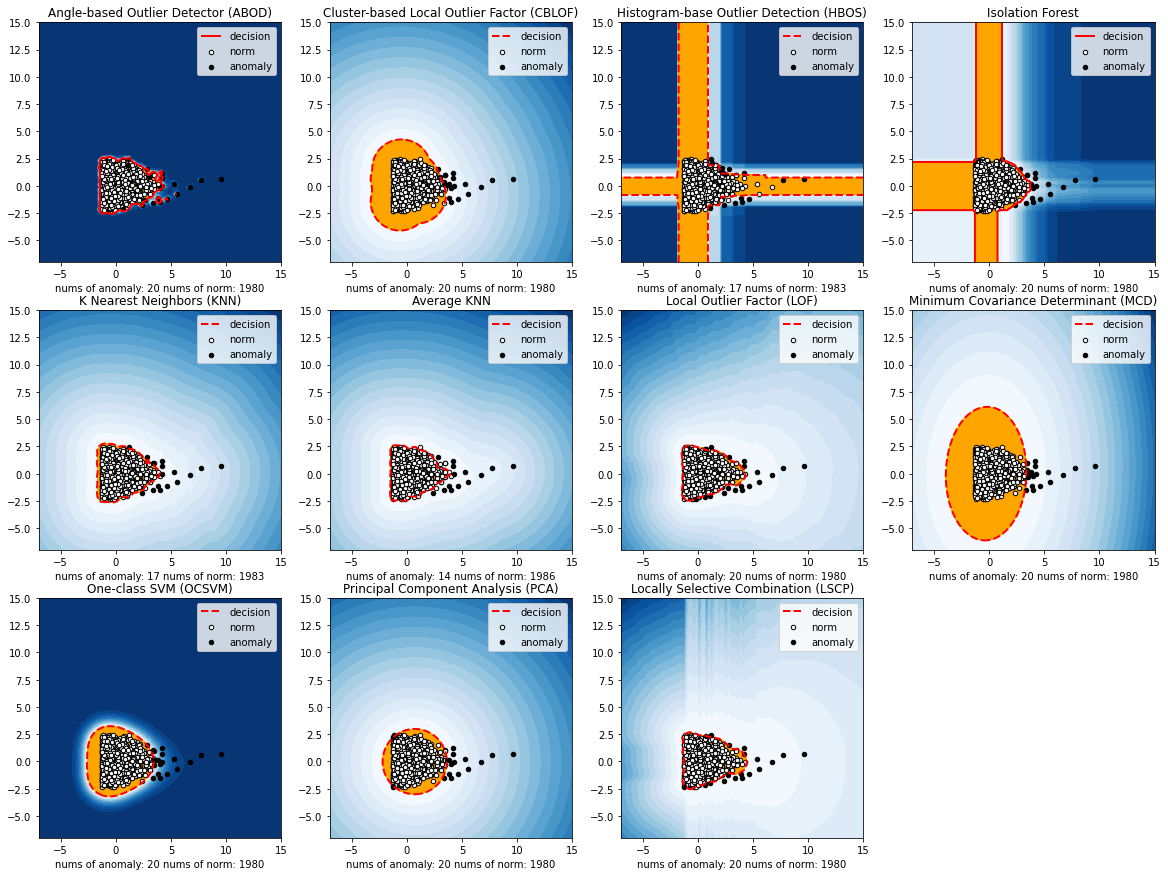

In [122]:
#将num_people和num_order合并成一个两列的numpy数组
# X1= X_tmp['1'].values.reshape(-1,1)
# X2 = X_tmp['2'].values.reshape(-1,1)
# X = np.concatenate((X1,X2),axis=1)
X = X_tmp.values
xx , yy = np.meshgrid(np.linspace(min_value, max_value, 100), np.linspace(min_value, max_value, 100))
plt.figure(figsize=(20, 15))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #训练数据
    clf.fit(X)
    # 预测异常值分数
    scores_pred = clf.decision_function(X)*-1
    # 预测异常值和正常值的数据
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
 
    df = X_tmp.loc[:,['1', '2']]
    df['outlier'] = y_pred.tolist()
    #过滤出fea_1和fea_2的正常值
    inliers_1 = np.array(df['1'][df['outlier'] == 0]).reshape(-1,1)
    inliers_2 = np.array(df['2'][df['outlier'] == 0]).reshape(-1,1)
 
    #过滤出fea_1和fea_2的异常值
    outliers_1 = df['1'][df['outlier'] == 1].values.reshape(-1,1)
    outliers_2 = df['2'][df['outlier'] == 1].values.reshape(-1,1)
        
    # 设定一个阈值用以识别正常值和异常值的标准
    threshold = np.percentile(scores_pred, 100 * outliers_fraction)# 百分位线
 
    #决策函数为每一个数据点计算异常值分数
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3,4,i+1)
    #在图上对从最小的异常值分数到阈值的范围内进行分层着色
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20),cmap=plt.cm.Blues_r)
    #在异常值分数等于阈值处画红色线条
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    
    #填充橙色轮廓线，其中异常分数的范围是从阈值到最大异常分数
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = plt.scatter(x=inliers_1, y=inliers_2, c='white',s=20, edgecolor='k')    
    c = plt.scatter(x=outliers_1, y=outliers_2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')   
    plt.legend([a.collections[0], b,c], ['decision', 'norm','anomaly'], loc='upper right')
 
    plt.xlim((min_value, max_value))
    plt.ylim((min_value, max_value))
    ss = 'nums of anomaly: '+str(n_outliers)+' nums of norm: '+str(n_inliers)
    plt.title(clf_name)
    plt.xlabel(ss)
plt.show();

## 最终选择IsolationForest，因为这个计算最快

In [133]:
X_rsp32

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.708794,-0.723713,1.466915,0.454904,-0.675541,1.015649,-0.608027,-0.371373,2.173076,0.757310,...,-1.813517,-0.022461,0.000000,1.003404,1.067204,0.982603,0.852593,0.920366,0.853741,0.771432
1,0.900771,0.069098,1.612289,2.089648,1.109618,0.889506,0.110880,-0.171798,2.173076,0.470375,...,0.508394,0.934865,0.000000,0.857136,0.747389,0.996611,0.790457,0.765875,0.923511,0.850548
2,1.366712,1.114166,-1.385177,1.040457,-0.843880,1.425866,-0.798151,-0.807115,0.000000,1.155920,...,0.742418,0.163538,0.000000,1.453993,1.868135,0.977681,1.931689,1.033562,1.579627,1.602993
3,0.907542,1.112218,1.354833,0.723252,1.008751,1.181458,-0.101029,-0.574277,0.000000,1.403446,...,0.853183,-0.764381,0.000000,1.177070,0.926694,0.990393,1.142528,1.089035,0.989048,1.108498
4,1.772260,-0.638004,-0.451898,1.417073,0.161868,1.024169,-0.407010,1.389426,2.173076,0.585955,...,-0.242812,-1.465235,3.101961,1.040527,1.065762,1.154507,0.748957,0.415975,0.930093,0.851782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153995,2.344347,-0.523075,-0.051288,0.227995,1.327202,1.570881,-0.442658,-1.607079,0.000000,1.269107,...,-1.387944,-0.356518,0.000000,0.926043,0.710197,0.987510,1.045772,0.234137,0.755745,0.724832
153996,1.960027,0.489852,0.551394,0.283329,0.683751,0.350031,-0.403049,-0.936284,0.000000,0.442803,...,1.605223,-1.737142,0.000000,1.428359,0.914929,0.992624,0.863458,0.383502,0.710365,0.750153
153997,0.825371,-0.702286,-1.740289,0.814598,-0.402187,0.980655,-0.814985,-0.318153,2.173076,1.015160,...,0.006202,-0.510228,0.000000,2.366500,2.318588,1.061494,0.887884,1.606361,1.767975,1.381561
153998,0.878444,0.582379,0.584686,1.156430,1.615556,0.953906,1.480368,-1.062128,0.000000,0.751896,...,0.829864,-0.157304,0.000000,1.082263,1.263672,1.118675,0.747353,0.917878,1.072914,0.940416


In [47]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
fea = X_rsp32.columns
X_rsp32[fea] = StandardScaler().fit_transform(X_rsp32[fea])
X_rsp42[fea] = StandardScaler().fit_transform(X_rsp42[fea])

In [48]:
# 异常值比例
outliers_fraction = 0.005
IF1 = IForest(
    contamination=outliers_fraction,
    random_state=0
)
IF1.fit(X_rsp32)
y_pred_rsp32 = IF1.predict(X_rsp32)

IF2 = IForest(
    contamination=outliers_fraction,
    random_state=0
)
IF2.fit(X_rsp42)
y_pred_rsp42 = IF2.predict(X_rsp42)

In [189]:
# 保存模型
dump(IF1, 'isolation forest rsp32.joblib')
dump(IF2, 'isolation forest rsp42.joblib')

['isolation forest rsp42.joblib']

In [49]:
X_rsp32_AD = X_rsp32.iloc[y_pred_rsp32 != 1, :]
X_rsp42_AD = X_rsp42.iloc[y_pred_rsp42 != 1, :]

In [50]:
print('rsp32: ',X_rsp32.shape)
print('rsp42: ',X_rsp42.shape)
print('-'*16+'异常检测之后'+'-'*16)
print('rsp32_AD: ',X_rsp32_AD.shape)
print('rsp42_AD: ',X_rsp42_AD.shape)

rsp32:  (154000, 28)
rsp42:  (154000, 28)
----------------异常检测之后----------------
rsp32_AD:  (153230, 28)
rsp42_AD:  (153230, 28)


----

### 可视化异常检测结果

In [51]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

def plot_pca_(num, data, label, clf=None):
    pca=PCA(n_components=num)
    X_pca=pca.fit_transform(data)
    # print(pca.components_)
    # 分割数据
    X_failure=np.array([x for i,x in enumerate(X_pca) if label[i]==1])
    X_healthy=np.array([x for i,x in enumerate(X_pca) if label[i]==0])
    
    if num==3:
        fig = plt.figure(figsize=[10,15])
        ax = Axes3D(fig)   
        #ax.legend(loc='best')
        ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
        ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
        ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
        ax.scatter(X_failure[:,0], X_failure[:,1], X_failure[:,2])
        ax.scatter(X_healthy[:,0], X_healthy[:,1], X_healthy[:,2])
    elif num==2:
        plt.figure(figsize=[10,10])
        plt.scatter(X_failure[:,0],X_failure[:,1], label='anomaly')
        plt.scatter(X_healthy[:,0],X_healthy[:,1], label='norm')
        plt.legend()
    else:
        print('i do not want to work.....')


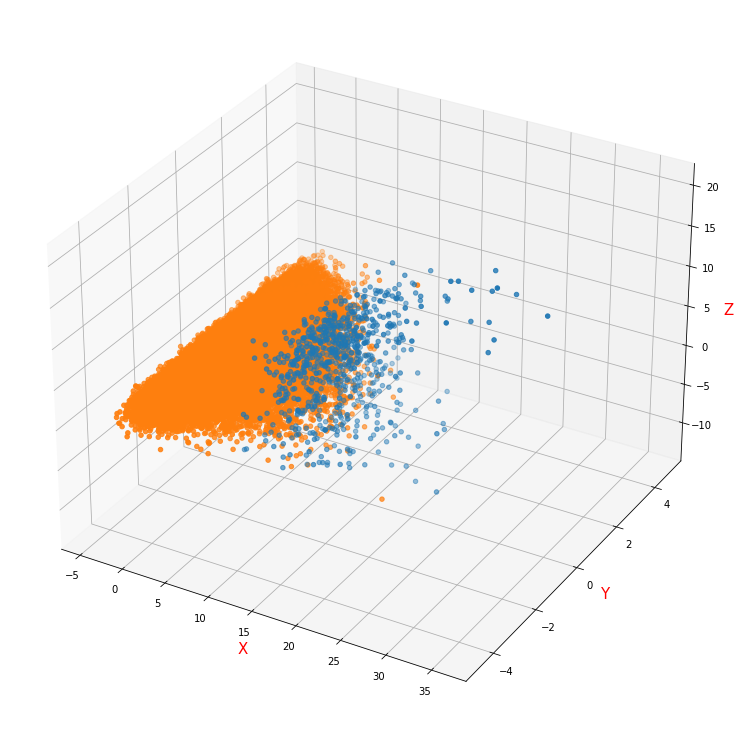

In [52]:
# to visualize the data without the node_path feature
%matplotlib inline
plot_pca_(num=3,data=X_rsp32,label=y_pred_rsp32)

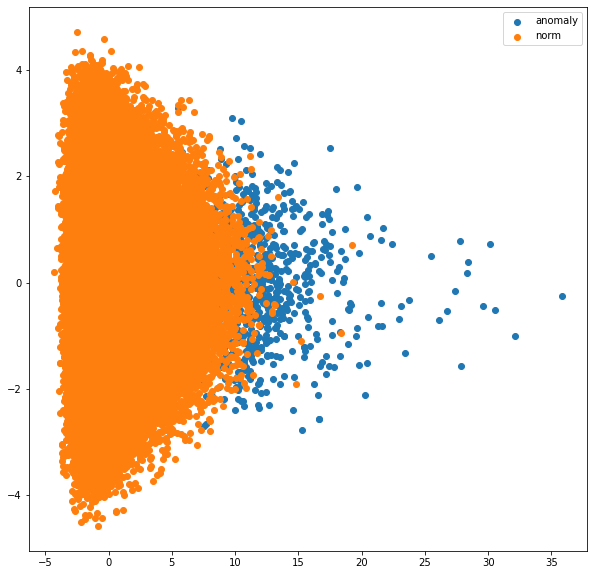

In [53]:
# to visualize the data without the node_path feature
%matplotlib inline
plot_pca_(num=2,data=X_rsp32,label=y_pred_rsp32)

# 下面是异常检测的一个使用例子

In [54]:
from anomaly_detection import anomaly_detection_, plot_pca

X_test = X_rsp32
X_test_AD, y_pred_test = anomaly_detection_(X_test)

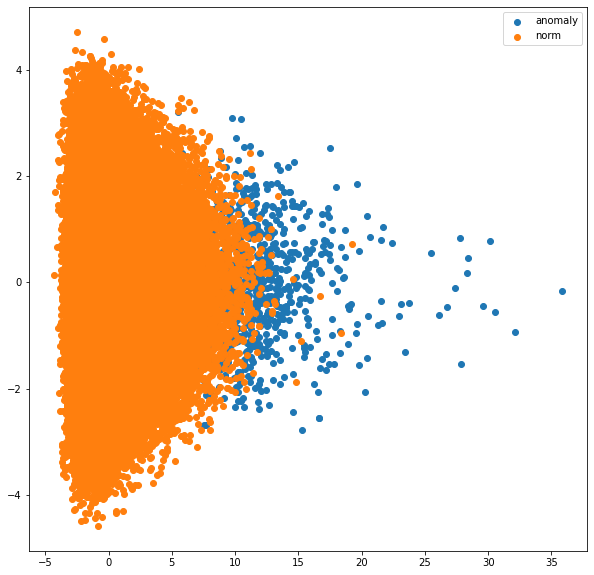

In [62]:
plot_pca(num=2,data=X_test,label=y_pred_test)
